In [4]:
! pip install scikit-learn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ----- ------------------------------- 41.0/293.3 kB 960.0 kB/s eta 0:00:01
     ----------- ------------------------- 92.2/293.3 kB 744.7 kB/s eta 0:00:01
     --------------- -------------------- 122.9/293.3 kB 798.9 kB/s eta 0:00:01
     --------------------- -------------- 174.1/293.3 kB 807.1 kB/s eta 0:00:01
     ------------------------- ---------- 204.8/293.3 kB 778.2 kB/s eta 0:00:01
     ------------------------------ ----- 245.8/293.3 kB 793.0 kB/s eta 0:00:01
     -----------------------------------  286.7/293.3 kB 737.3 kB/s eta 0:00:01
     ------------------------------------ 293.3/293.3 kB 723.9 kB/s eta 0:00:00
     ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/8.3 MB 660.6 kB/s eta 0:00:13
     ---------------------------------------- 0.1/8.3 MB 770.8 kB/s eta 0:00:11
      --------------------------------------- 0.1/8.3 MB

In [1]:
!pip install plotly

     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     --------------------------------------- 0.0/15.3 MB 660.6 kB/s eta 0:00:24
     --------------------------------------- 0.0/15.3 MB 660.6 kB/s eta 0:00:24
     --------------------------------------- 0.0/15.3 MB 217.9 kB/s eta 0:01:11
     --------------------------------------- 0.1/15.3 MB 328.6 kB/s eta 0:00:47
     --------------------------------------- 0.1/15.3 MB 438.1 kB/s eta 0:00:35
     --------------------------------------- 0.1/15.3 MB 385.0 kB/s eta 0:00:40
     --------------------------------------- 0.1/15.3 MB 379.3 kB/s eta 0:00:41
     --------------------------------------- 0.2/15.3 MB 399.3 kB/s eta 0:00:39
     --------------------------------------- 0.2/15.3 MB 403.5 kB/s eta 0:00:38
     --------------------------------------- 0.2/15.3 MB 421.8 kB/s eta 0:00:36
      -------------------------------------- 0.2/15.3 MB 402.0 kB/s eta 0:00:38
      -------------------------------------- 0.2

In [3]:
# Import Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Load the Dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [7]:
# Check the first five rows of the train dataset
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
# Check the dimensions of the train dataset
train_df.shape

(8523, 12)

In [9]:
# Check the basic information of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:

# Check the summary statistics of the train dataset
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
# Check for missing values in the train dataset
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

C:\Users\mridu\AppData\Local\Temp\ipykernel_16280\486126223.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

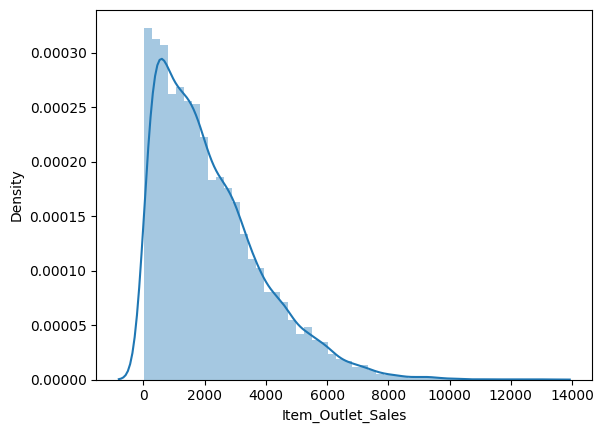

In [12]:
# Check the distribution of the target variable (Item_Outlet_Sales) in the train dataset
sns.distplot(train_df['Item_Outlet_Sales'])

## Data Preprocessing

In [13]:
# Combine the train and test datasets
df = pd.concat([train_df, test_df], ignore_index=True)
'''
Ignore index basically means that we ignore the indices of the individual datasets and generate new ones 
for the combined dataset
'''

In [14]:
# Check for missing values in the combined dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [15]:
# Fill missing values in the Item_Weight column with the mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

'''
Inplace = True , basically means that the changes made are only relflected in the original dataframe
Inplace = False, means that the changes made are relfected in a new copy of the dataframe and returns 
the new dataframe with the applied changes
'''

In [16]:
# Fill missing values in the Outlet_Size column with the mode value
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

'''
mode()[0] ---> This function returns an array of most frequent values sorted in descending order
[0] ---> This is the first element of the array we got from the mode() function
This is replace all the null values in the column using the fillna() function
'''

In [17]:
# Convert categorical variables to numerical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
'''
The above library is used to encode the categorical values into the numeric variables
It assigns a unique integer value to each category in the variable
'''

In [18]:
le = LabelEncoder()
## Applying fit_transform to all the categorical columns in the dataset
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

In [19]:
# Split the combined dataset back into train and test datasets
# This is done to apply the training model after all the preprocessing has been done
train_df = df[df['Item_Outlet_Sales'].notnull()]
test_df = df[df['Item_Outlet_Sales'].isnull()]

In [20]:
# Drop irrelevant columns from the train and test datasets
train_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

test_df_copy = test_df.copy()  # Copy of Test Dataframe to use later
test_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1, inplace=True)

'''
Basically , axis = 1 tells the function to drop the columns and not the rows
If we want to drop the columns, we need to specify axis=0
'''

C:\Users\mridu\AppData\Local\Temp\ipykernel_16280\1370602730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
C:\Users\mridu\AppData\Local\Temp\ipykernel_16280\1370602730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1, inplace=True)


In [21]:
# Split the Data into Train and Test Sets
X_train = train_df.drop('Item_Outlet_Sales', axis=1)
y_train = train_df['Item_Outlet_Sales'] ## Here we get only this column

In [22]:
# Build the Predictive Model
from sklearn.ensemble import RandomForestRegressor

'''
I could have also used simple Linear Regression model using the line:
`from sklearn.linear_model import Linear Regression`
Now I did not use this since I thought there is no simple and linear relationship between
the target variable and the input fields
'''

In [23]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [24]:
# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

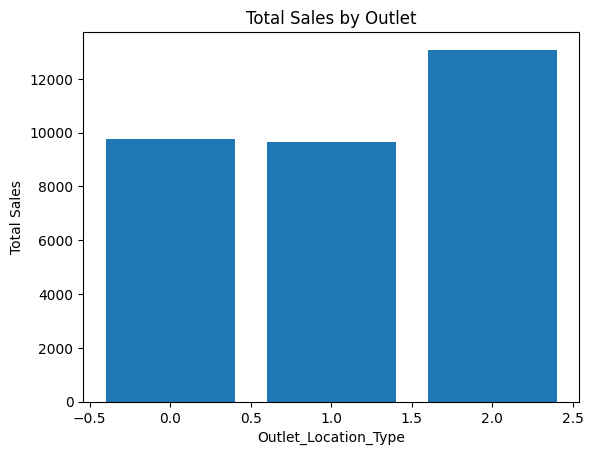

In [34]:
# Create a bar chart of total sales by city/outlet
plt.bar(train_df['Outlet_Location_Type'], train_df['Item_Outlet_Sales'])
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet')
plt.show()

Text(0, 0.5, 'Total Sales')

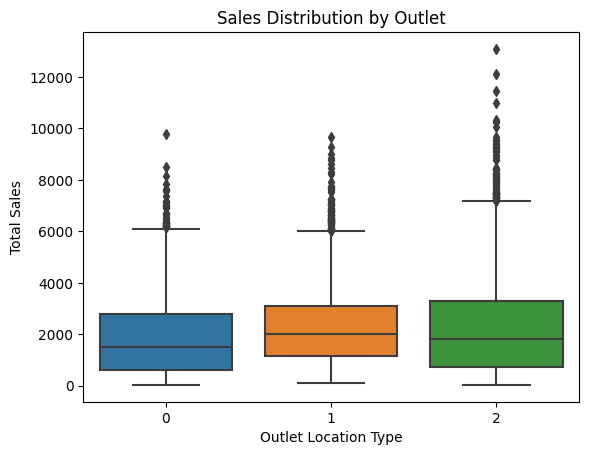

In [35]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Sales Distribution by Outlet')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

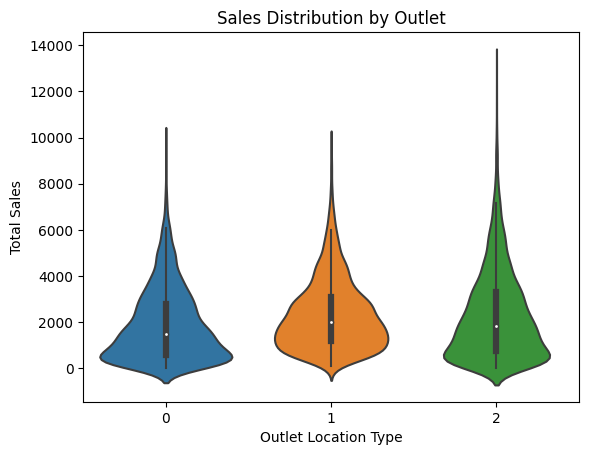

In [38]:
sns.violinplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Sales Distribution by Outlet')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')

Text(0, 0.5, 'Total Sales')

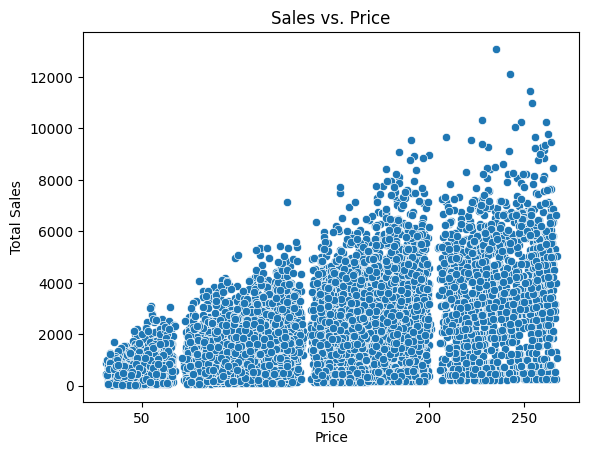

In [39]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_df)
plt.title('Sales vs. Price')
plt.xlabel('Price')
plt.ylabel('Total Sales')

Text(0.5, 1.0, 'Correlation Matrix')

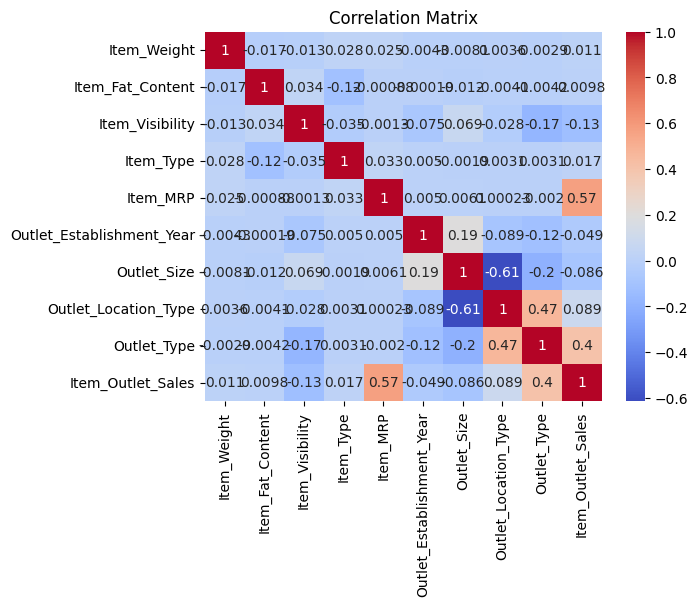

In [40]:
corr = train_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')

In [25]:
# Predict the Sales for the Test Data
y_pred = rf.predict(test_df)


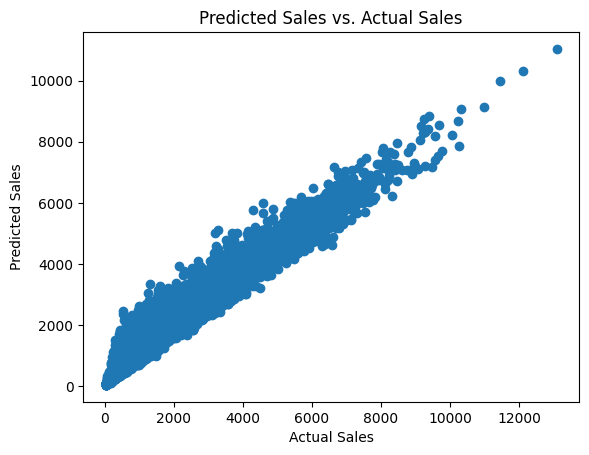

In [27]:
# Create a scatter plot of the predicted sales vs. the actual sales in the training data
plt.scatter(y_train, rf.predict(X_train))
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales vs. Actual Sales')
plt.show()

In [28]:
# Calculate the differences between the predicted and actual sales
residuals = y_train - rf.predict(X_train)

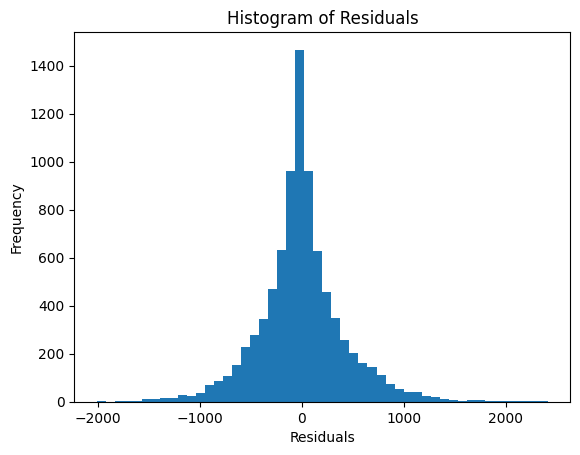

In [29]:
# Create a histogram of the residuals
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

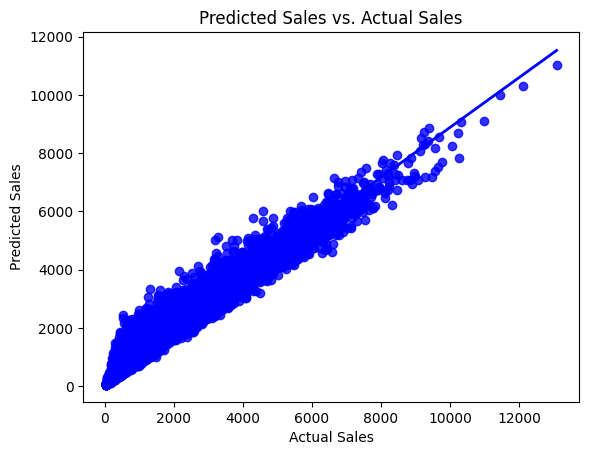

In [30]:
# Create a scatter plot of the predicted sales vs. the actual sales in the training data using seaborn
sns.regplot(x=y_train, y=rf.predict(X_train), color='b', line_kws={'linewidth':2})
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales vs. Actual Sales')
plt.show()

In [26]:
# Create a Submission File
submission = pd.DataFrame({'Item_Identifier': test_df_copy['Item_Identifier'],
                           'Outlet_Identifier': test_df_copy['Outlet_Identifier'],
                           'Item_Outlet_Sales': y_pred})
submission.to_csv('submission.csv', index=False)